# Lending Club Case-Study 

This case study has four parts as follows :
1. Data understanding
2. Data cleaning (which includes cleaning missing values, removing empty columns and rows, etc.)
3. Data Analysis
4. Recommendations

### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

### 1. Data Understanding

In [2]:
# Read data files 

In [3]:
#reading dataframe from loan.csv
loan = pd.read_csv(r'C:\Users\palhi\OneDrive\Desktop\AI&ML\LendingClubCaseStudy\loan\loan.csv',encoding='ISO-8859-1')


C:\Users\palhi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#looking at the head
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# looking at the shape of the dataframe
loan.shape

(39717, 111)

####  As we can see there are 111 columns and  39717 rows . And by initail glance at the data we can see many columns are empty

### 2. Data cleaning 

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
#Inspecting the Null values percentage , column-wise
print(round(100*(loan.isnull().sum()/len(loan.index)), 2))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [8]:
# drop columns where all values are nan
loan = loan.dropna(axis=1, how='all')

In [9]:
#Inspecting the Null values percentage , column-wise
print(round(100*(loan.isnull().sum()/len(loan.index)), 2))

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [10]:
# drop rows where all values are nan
loan = loan.dropna(axis=0, how='all')

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [12]:
#Inspecting the Null values percentage , column-wise
print(round(100*(loan.isna().sum()/len(loan.index)),2))

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [13]:
# removing the columns having more than 90% missing values
cols_to_drop = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(cols_to_drop)

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')


In [14]:
# drop columns where more than 90% values are nan
loan = loan.loc[:, ~loan.columns.isin(cols_to_drop)]

In [15]:
print(round(100*(loan.isna().sum()/len(loan.index)),2))

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [16]:
loan.shape

(39717, 55)

In [17]:
#From above data we can see still there are two columns where we have (desc)32% and (mths_since_last_delinq)65% missing values.
#We can drop them but lets see what these columns have.

loan.loc[:,['mths_since_last_delinq', 'desc']].head(5)

,mths_since_last_delinq,desc
0,NaN,Borrower added on 12/22/11 > I need to upgra...
1,NaN,Borrower added on 12/22/11 > I plan to use t...
2,NaN,NaN
3,35.0,Borrower added on 12/21/11 > to pay for prop...
4,38.0,Borrower added on 12/21/11 > I plan on combi...


#### From above we can see that 'desc' column have  Loan description provided by the borrower which is not relevant for our current analysis. So we can drop this column.

#### Similarly , we have 'mths_since_last_delinq' column which has data which will bot be present at the time when a borrower is applying for the loan. So its of no use for analysis as well. So we can drop this column as well.

In [18]:
#loan[loan.isin(['mths_since_last_delinq','desc'])]
cols_to_drop = ['mths_since_last_delinq','desc']
loan = loan.loc[:, ~loan.columns.isin(cols_to_drop)]

In [19]:
loan.shape

(39717, 53)

In [20]:
#Inspecting the Null values percentage , column-wise
print(round(100*(loan.isna().sum()/len(loan.index)),2))

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

###### From above we can see still there are some columns with missing values , but for current analysis there is no need to impute them as we are not doing any modelling here. We can ignore them as of now. So we have treated columns till now. Lets check if there are row with lot of missing values.

In [21]:
# Calculate number of missing values in each row 
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [22]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

#### So our data is pretty much clean now and we are good to go for further analysis.

In [23]:
# looking at the loan data frame
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [24]:
## Lets look at some columns where  values are not in correct format like 'int_rate' , emp_length

In [25]:
# Lets correct 'int_rate' which is interest rate column and should be numeric 
loan.loc[:,['int_rate']].head()

,int_rate
0,10.65%
1,15.27%
2,15.96%
3,13.49%
4,12.69%


In [26]:
datatypeOfIntRateCol = loan.dtypes['int_rate']
print(datatypeOfIntRateCol)

object


In [27]:
# removing the '%'' sign from the column values
loan['int_rate'] = loan['int_rate'].apply(lambda x : x.rstrip('%'))

In [28]:
loan.loc[:,['int_rate']].head()

,int_rate
0,10.65
1,15.27
2,15.96
3,13.49
4,12.69


In [29]:
datatypeOfIntRateCol = loan.dtypes['int_rate']
print(datatypeOfIntRateCol)

object


In [30]:
#converting datatype of column
loan.astype({'int_rate': 'float64'}).dtypes  
#loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0])) -- another way in one line

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [31]:
# Lets correct 'emp_Length' which is emploment length column and should be numeric 
loan.loc[:,['emp_length']].head()

,emp_length
0,10+ years
1,< 1 year
2,10+ years
3,10+ years
4,1 year


In [32]:
#checking the data type of column.
dtypeOfemp_length = loan.dtypes['emp_length']
print(dtypeOfemp_length)

object


In [33]:
#we have to get the numerical part out of the string and convert it to numerical type (float)
# Here we need to use use regex library to get the desired output 

# first,we have to drop the missing values from the column otherwise the regex code will throw error
loan = loan[~loan['emp_length'].isnull()]

In [34]:
#using regex for getting numerial part
import re
loan['emp_length']= loan['emp_length'].apply(lambda x : re.findall(r'\d+', str(x))[0])

In [35]:
#lets look at 'emp_Length' which is employment length column and should be numeric 
loan.loc[:,['emp_length']].head()

,emp_length
0,10
1,1
2,10
3,10
4,1


In [36]:
#checking the data type of column.
dtypeOfemp_length = loan.dtypes['emp_length']
print(dtypeOfemp_length)

object


In [37]:
#converting the data type of the column 
loan.astype({'emp_length': 'int64'}).dtypes  

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

#### So now we have the data in the desired format.

## 3. Data Analysis

Now we can start data analysis. As we know the objective of the analysis is to identify the predictors/variables so that at the time of loan appliccation for approval or rejection of the loan.

Now, there are broadly three types of variables - 

1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.)
2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) 
3. Customer behaviour variables (those which are generated after the loan is approved such as 'last_credit_pull_d','delinq_2yrs', next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for loan approval or rejection . 

Thus, we will use only the other two types of variables, that is,  "Demographic variables" ,  "Loan characteristics variables"


In [38]:
# We can drop the columns which falls in the category of behavioural variables.

In [39]:
drop_behvar = ["delinq_2yrs",
               "earliest_cr_line",
               "inq_last_6mths",
               "open_acc",
               "pub_rec",
               "revol_bal",
               "revol_util",
               "total_acc",
               "out_prncp",
               "out_prncp_inv",
               "total_pymnt",
               "total_pymnt_inv",
               "total_rec_prncp",              
               "total_rec_int",
               "total_rec_late_fee",
               "recoveries",
               "collection_recovery_fee",
               "application_type",
               "last_pymnt_d",
               "last_pymnt_amnt",
               "last_credit_pull_d" ]

In [40]:
loan = loan.loc[:, ~loan.columns.isin(drop_behvar)]

In [41]:
loan.shape

(38642, 32)

In [42]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null object
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null object
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [43]:
#also we can drop url,zip_code, addr_state,title columns as they are not relevant for analysis.
loan= loan.drop(['url', 'zip_code', 'title','addr_state'], axis=1)

In [44]:
# As we know our target variable is 'loan_status' which has values 'Fully Paid', 'Current', and "Charged Off"
loan.loc[:, ['loan_status']].head(10)

,loan_status
0,Fully Paid
1,Charged Off
2,Fully Paid
3,Fully Paid
4,Current
5,Fully Paid
6,Fully Paid
7,Fully Paid
8,Charged Off
9,Charged Off


#### Out of these three status "Current" loan status is not helpful for our analysis, we can drop the rows with loan_status as current as these are neither defaulted nor they are fully paid .So we can get rid of them.


In [45]:
loan = loan.loc[(loan.loan_status) != "Current" , :]

In [46]:
#Checking if we have any loan_status with value "Current" 
loan.loc[(loan.loan_status) == "Current" , :]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [47]:
#loan['loan_status'] = loan['loan_status'].astype('category')
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

#### we can see that more loans are fully paid then defaulted.

In [48]:
#For further analysis we will assign 1 to Chrged OFf and 0 to Fully Paid (i.e,  1  for defaulted 0  not defaulted)
loan['loan_status'] = loan['loan_status'].apply(lambda x : 0 if x=="Fully Paid" else 1)

In [49]:
#Lets convert this column to have numerical values 
loan['loan_status'] = loan['loan_status'].apply(lambda x : pd.to_numeric(x))

In [50]:
#Chekcing data type of loan_status column 
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 28 columns):
id                            37544 non-null int64
member_id                     37544 non-null int64
loan_amnt                     37544 non-null int64
funded_amnt                   37544 non-null int64
funded_amnt_inv               37544 non-null float64
term                          37544 non-null object
int_rate                      37544 non-null object
installment                   37544 non-null float64
grade                         37544 non-null object
sub_grade                     37544 non-null object
emp_title                     36136 non-null object
emp_length                    37544 non-null object
home_ownership                37544 non-null object
annual_inc                    37544 non-null float64
verification_status           37544 non-null object
issue_d                       37544 non-null object
loan_status                   37544 non-null int64
pymnt_pla

In [51]:
#Validating the values count 
loan['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

### Univariate analysis

##### For univariate analysis we can proceed in the folowing two ways 
1. Deafult rate across various categorical features.
2. For continuous features , we can perfom binning and then univariate analysis.

#### Following are important columns/features on which can be used fo analysis are:
loan_amnt,term,int_rate,sub_grade,grade,annual_inc,verification_status,purpose,dti,funded_amnt,funded_amnt_inv,purpose etc.

In [52]:
#To avoid warnings
import warnings 
warnings.filterwarnings("ignore") 

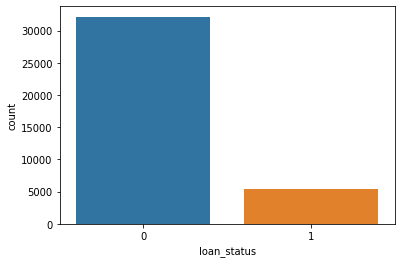

In [53]:
#lets see how many default and how many Paid loan
sns.countplot(x='loan_status',data= loan)

##### Here '0'  is for non-defaulters and '1' is for defaulters .So approx more than 300000 paid back the loan amount and nearlt 5000 defaulted

In [54]:
# Lets calculate the overall default rate
round(np.mean(loan['loan_status']), 2)

0.14

###### So the overll defult rate is 14% 

In [55]:
# Lets define a method which will create a bar plot using seaborn library for category variables like -  term, grade,
#home_ownership, sub_grade,verification_status, purpose
def createBarPlot(category_var):
    sns.barplot(x=category_var,y='loan_status',data= loan)
    

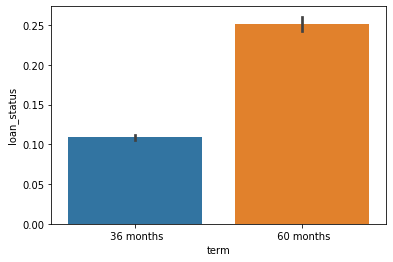

In [56]:
#Create bar plot for term
createBarPlot('term')

#### People who took loan for a term of 60 months are more likely to default as compared to those for 36 months.

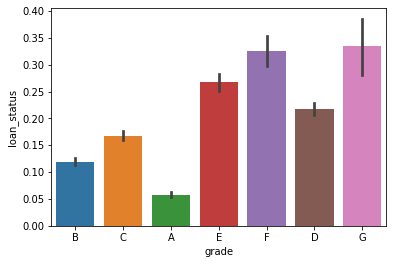

In [57]:
#Create bar plot for grade
createBarPlot('grade')

##### The above graph clearly shows that A grade  have less deafault percentage as compared to B and so on for higher grades  . The grade assgend  by lending club is one of the factors that is  helpful for investers to approve the loan or reject the loan.

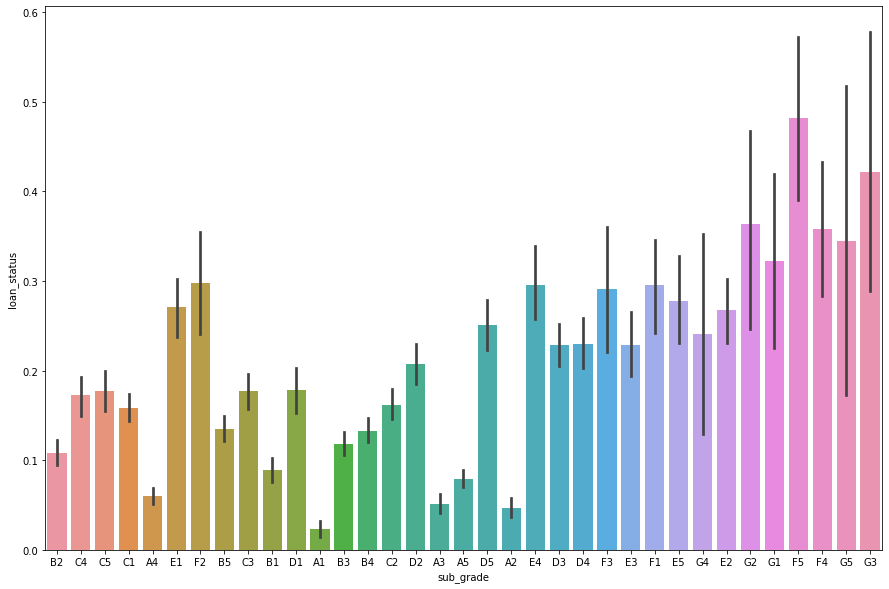

In [58]:
#Create bar plot for sub-grade
plt.figure(figsize=(15,10))
createBarPlot('sub_grade')

##### As the previous plot , sub-grade also behaves  on same lines . A1 grade is less risky to be given the loan as compared to A2 or A3 . This will be  helpful for investers to approve the loan or reject the loan.

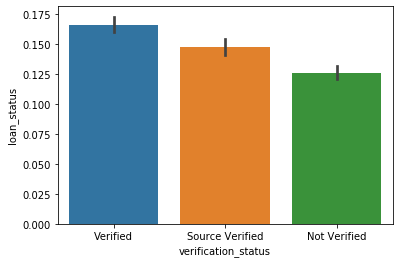

In [59]:
#Create bar plot for verification_status
createBarPlot('verification_status')

##### This is quite interesting outcome of analysis , that  borrowers with verified income source  by Lending Club  default more as compared to  not verified ones.

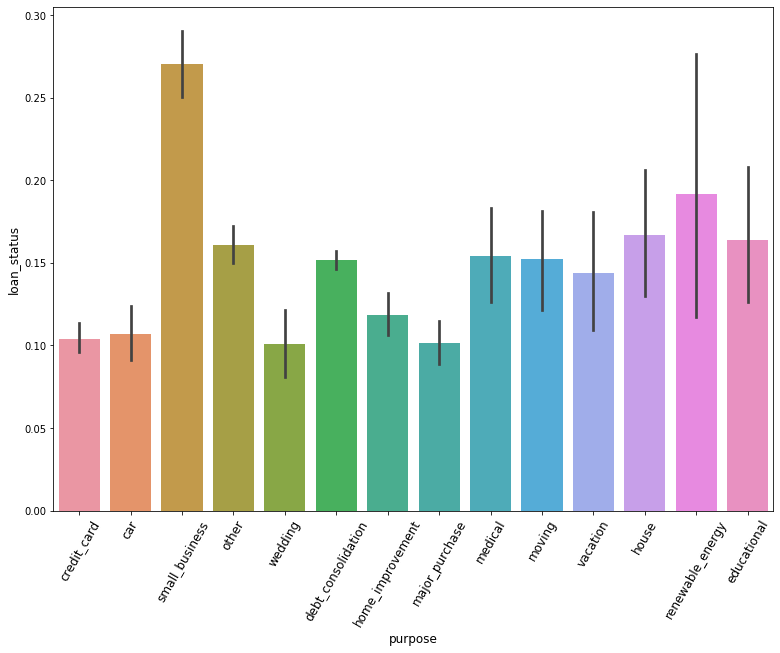

In [60]:
#Create bar plot for purpose
fig= plt.figure(figsize=(10,7))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xticklabels(loan.purpose, rotation= 60, fontsize='large')
ax.set_xlabel('purpose', fontsize='large')
ax.set_ylabel('loan_status',fontsize='large')
createBarPlot('purpose')

#### From the above plot its clear small_business default most , then renewable_energy are second most defaulters and so on. Weeding and Major Purchase are among the good options for granting the loans.

In [61]:
# We can also analyse the distribution of loans across years and months of a particular year
# Look at 'issue_d' column
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [62]:
#Converting the issue_d column into datetime format and then we can extract year and month columns and 
# we can use it for distribution of loans across the years and months
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))


In [63]:
#Looking at the head of issue_d
loan['issue_d'].head(10)

0    2011-12-01
1    2011-12-01
2    2011-12-01
3    2011-12-01
5    2011-12-01
6    2011-12-01
7    2011-12-01
8    2011-12-01
9    2011-12-01
10   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [64]:
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)


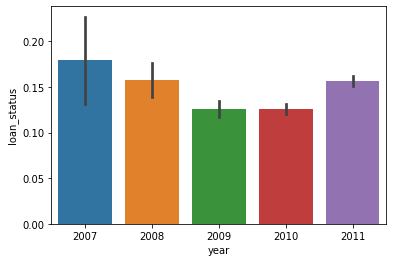

In [65]:
# Now we can compare the default rates across years
createBarPlot('year')

#### The default rate had shown abrupt increase in 2011. t  was going down from 2008 to 2010. In 2007 default rate was mximum.

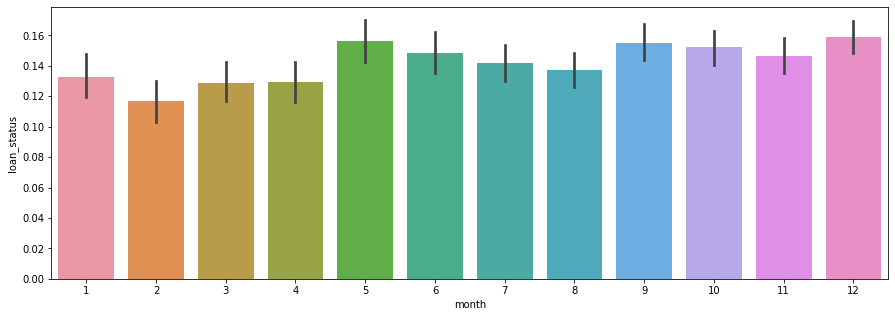

In [66]:
#Creating bar plot for months 
plt.figure(figsize=(15,5))
createBarPlot('month')

#### Loans which were taken during the end of the year in months like from September to December are defaulted more , but there is not much variation across the months in the middle of the year.

#### Now we we will analyse how default rate varies for numerical variables. We have to use the binning concept  for continuous numerical variables.


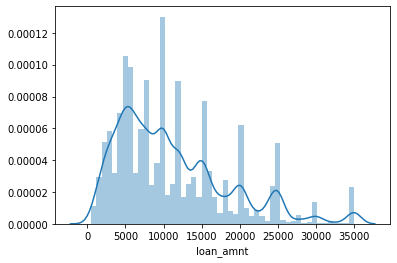

In [67]:
#lets see distribution of loan_amnt
sns.distplot(loan['loan_amnt'])
plt.show()

In [68]:
#Lets create bins for loan_amount 

In [69]:
def binLoanAmount(val):
    if val < 5000:
        return "low"
    elif 5000 <= val < 15000:
        return "medium"
    elif 15000 <= val< 25000:
        return "high"
    else:
        return "very high"

    
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x : binLoanAmount(x))
    

In [70]:
loan['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

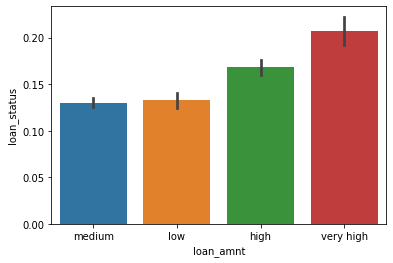

In [71]:
# Create bar plot for loan_amnt
createBarPlot('loan_amnt')

#### So, its clear from the above graph that more the loan amount more is the risk of default 

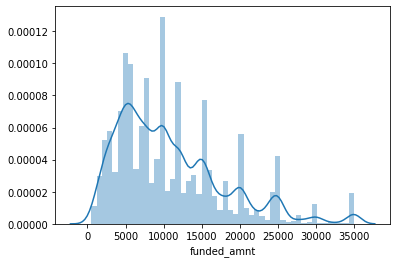

In [72]:
#Lets see the distribution of funded_amnt
sns.distplot(loan['funded_amnt'])
plt.show()

##### There is not much difference between  funded_amnt and loan_amnt , so we can do binning in the similar way .

In [73]:
#Create binning of the funded_amnt
loan['funded_amnt'] = loan['funded_amnt'].apply(lambda x : binLoanAmount(x))

In [74]:
loan['funded_amnt'].value_counts()

medium       20625
high          7416
low           7188
very high     2315
Name: funded_amnt, dtype: int64

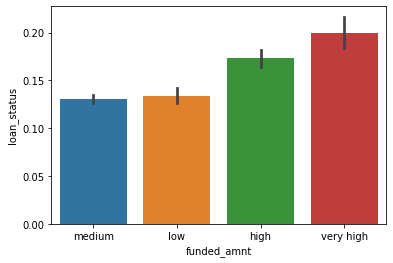

In [75]:
# Create bar plot for loan_amnt
createBarPlot('funded_amnt')

#### So, its clear from the above graph that more the funded amount more is the risk of default

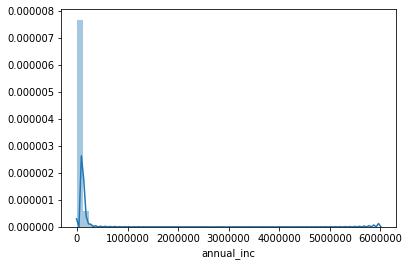

In [76]:
# Lets see distribution of loan_status across annual_inc
sns.distplot(loan['annual_inc'])
plt.show()

In [77]:
# Create bins for annual income
def annual_income(val):
    if val <= 50000:
        return 'low'
    elif val > 50000 and val <=100000:
        return 'medium'
    elif val > 100000 and val <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

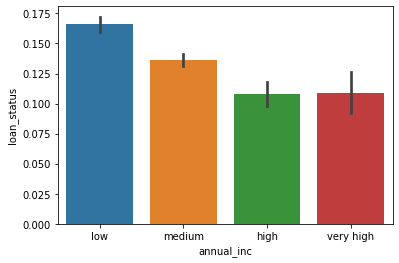

In [78]:
# Creating bar plot between default rates vs annual income 
createBarPlot('annual_inc')

####  So we can clearly see that lower the income more is the default rate

In [79]:
# Now lets convert int_rate to low, medium, high using binning
# binning int_rate
def interestRate(n):
    n=  float(n)
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: interestRate(x))

In [80]:
#Check column after binning 
loan.loc[:,['int_rate']].head()

,int_rate
0,medium
1,high
2,high
3,medium
5,low


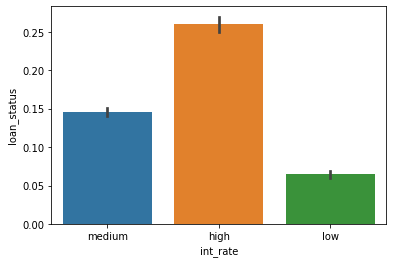

In [81]:
# Creating bar plotbetween default rates vs rates of interest
createBarPlot('int_rate')

#### So from the above plot we can say that interest rate is directly proportional to default rate. i.e, Higher the interset rate higher is the risk of default

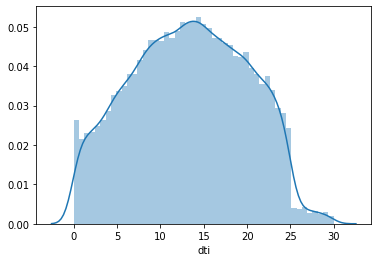

In [82]:
#Lets now see debts to income column and 
#Lets see the distribution of funded_amnt
sns.distplot(loan['dti'])
plt.show()

In [83]:
#lets create bins for dti column
def bindti(val):
    if val < 10:
        return "low"
    elif  10 <= val< 20:
        return "medium"
    else:
        return "high"
        
loan['dti'] = loan['dti'].apply(lambda x : bindti(x))
   


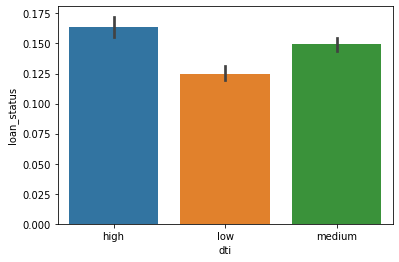

In [84]:
# lets plot dti vs default rate
createBarPlot('dti')

#### So from the above graph we can say that if dti is less , default risk is also less as compared to high dti values. 

## Segmented Univariate Analysis

Now we have to compare the default rates across two variables. 
and some of the important predictors are purpose of the loan, term ,interest rate, annual income, grade etc.


Gemnerally in the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 




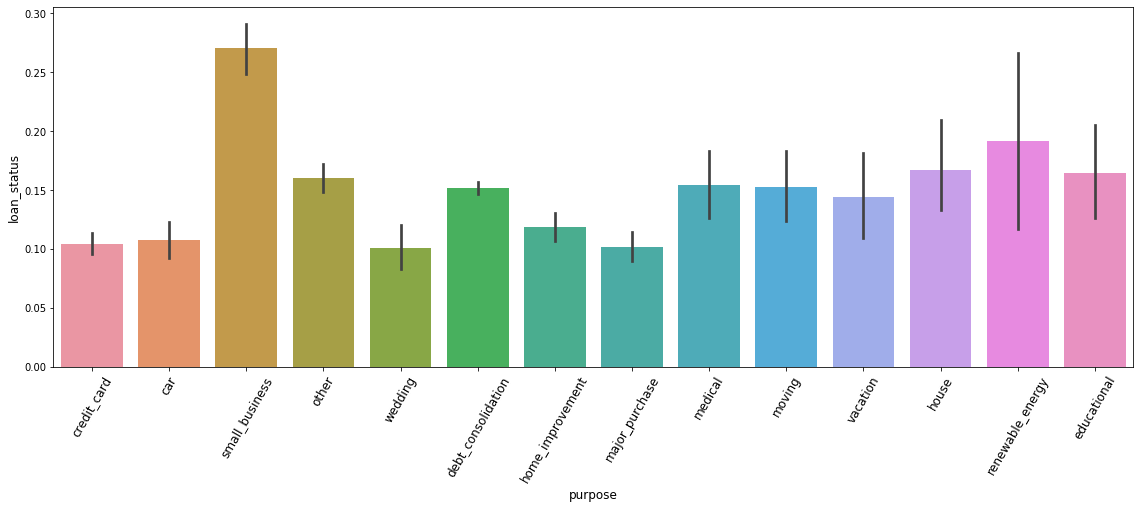

In [85]:
#As we have already seen in earlier plots of purpose. lets have a look
#Create bar plot for purpose
fig= plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xticklabels(loan.purpose, rotation= 60, fontsize='large')
ax.set_xlabel('purpose', fontsize='large')
ax.set_ylabel('loan_status',fontsize='large')
createBarPlot('purpose')

In [86]:
#Lets take five types of purpose for furthee analysis 

imp_purposes = ["small_business","medical","debt_consolidation","credit_card","educational"]
pdf = loan[loan['purpose'].isin(imp_purposes)]
pdf['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
small_business         1710
medical                 656
educational             317
Name: purpose, dtype: int64

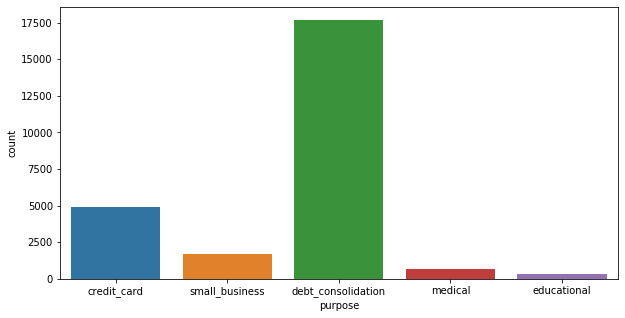

In [87]:
# plotting number of loans by purpose 
plt.figure(figsize=(10,5))
sns.countplot(x=pdf['purpose'])
plt.show()

#### Lets now perform bivariate analysis between purpose of loan and other categorical variables like term, grade, sub_grade, etc

In [88]:
#Lets define a function for creating plots which takes a categorical variable as input and plots 
# the default rate vs purpose

def bivariatePlot(val):
    plt.figure(figsize=(15,5))
    sns.barplot(x=val,y='loan_status',data=pdf, hue='purpose')
    plt.show()

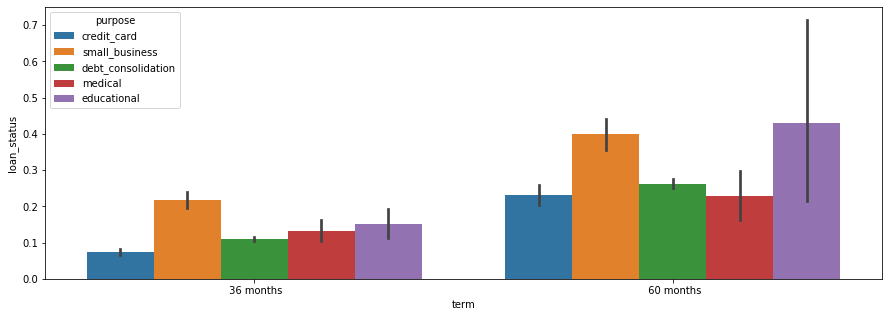

In [89]:
#For term 
bivariatePlot('term')

#### From above plot , we can find the insights between purpose of loan and the term. Cleraly , small_business with 36 months term are more likely to be defaulted .On the other hand for 60 months term educational loans are more likely to be defaulted. 

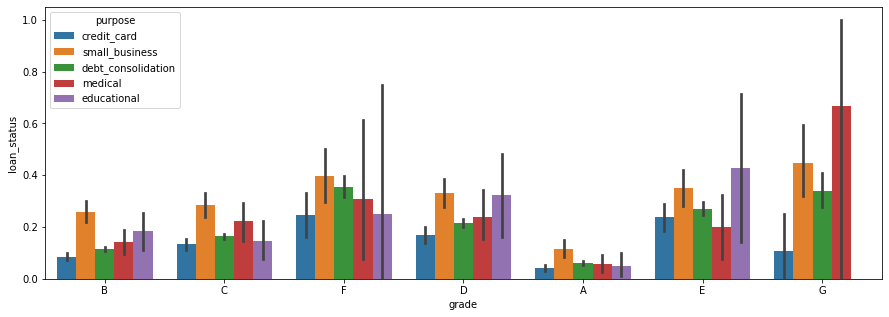

In [90]:
#For grade 
bivariatePlot('grade')

#### For A grades default risk is less for all types of the loan purposes which increse for B  which is less than C and so on.

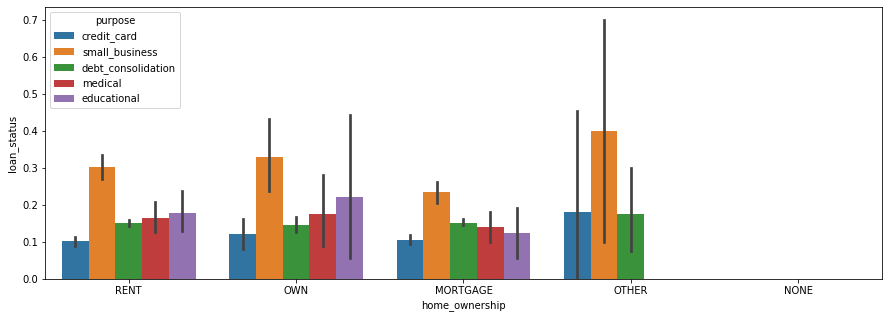

In [91]:
# home ownership
bivariatePlot('home_ownership')

#### For "OWN " category of  home owner ship there are more chances of default. 

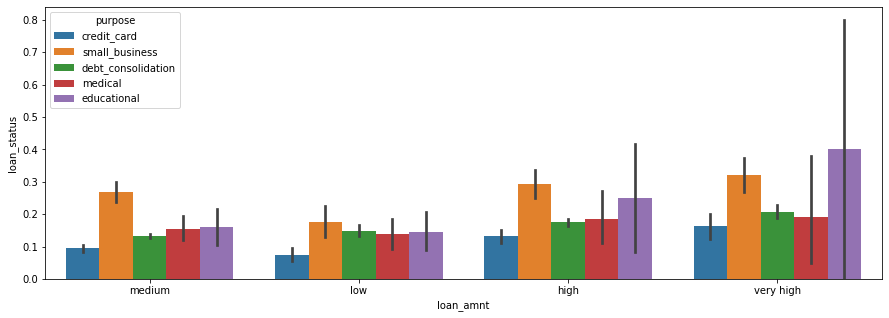

In [92]:
# For loan amount
bivariatePlot('loan_amnt')

####  Higher the loan amount higher is the default rate. Also  education loans are more likely to default if loan_amount are high which is followed by the small_business

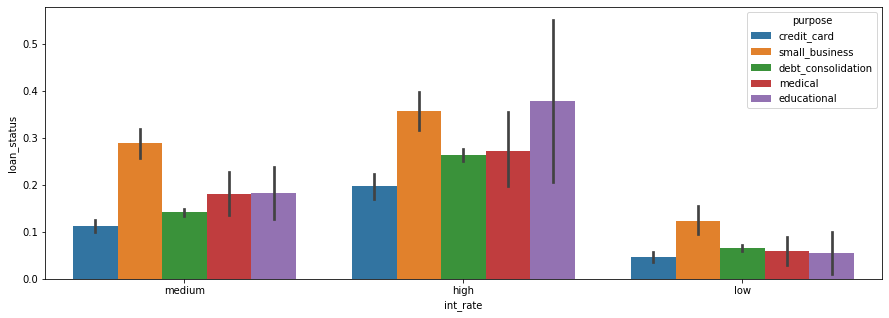

In [93]:
# for interest rate
bivariatePlot('int_rate')

####  Higher the interest rate higher is the default rate. Also education loans are more likely to default if int_rate  is high which is followed by the small_business and so on.

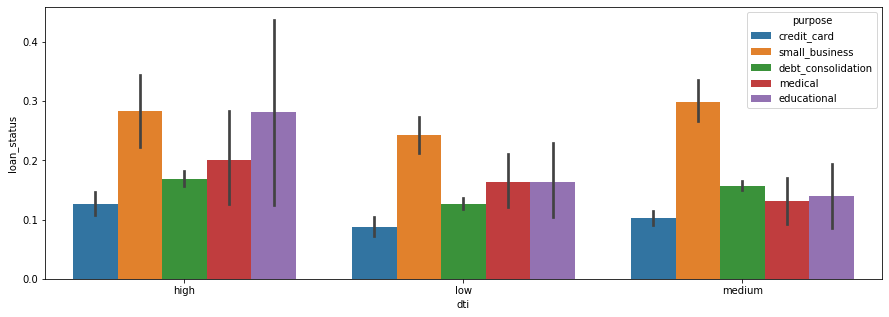

In [94]:
# for dti(debt to income ratio)
bivariatePlot('dti')

####  Higher the dti ratio higher is the default rate. So low dti ratio is safe for loan approval for the borrowers

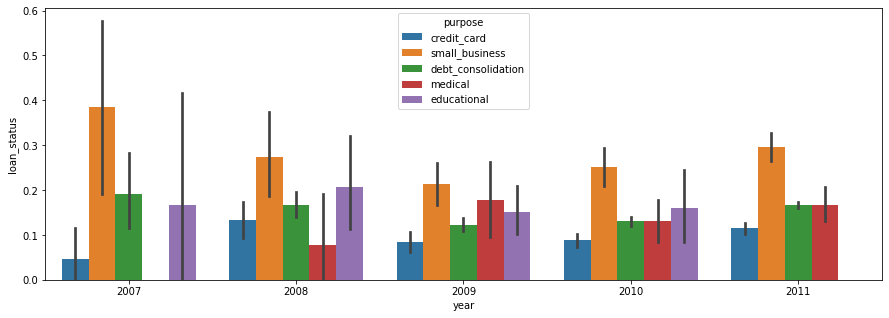

In [95]:
# for year
bivariatePlot('year')

#### From 2007 to 2011 , small_business are the main defaulters  

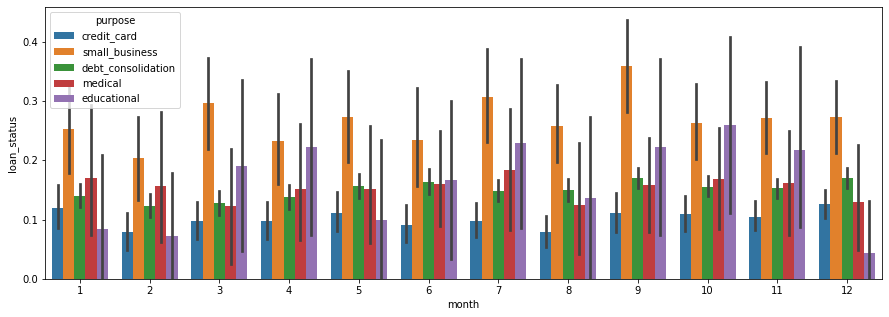

In [96]:
# for months 
bivariatePlot('month')

#### From Jan to December  , small_business are the main defaulters. Also loans taken during the last quater are more likely to default  . Safest are the educational loans as per the above plot 

#### Most important predictors
5 important driver variables (i.e. variables which are strong indicators of default).

In [97]:
# For this we can check how much the default rate varies across multiple categories

In [99]:
#Lets define a general method for chekcing how much the default rate varies across multiple categories 
#where category will be passed and we will get the variation.
def defaultRateDiff(cat_var):
    default_rates = pdf.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))


In [100]:
#For interest_rate
default_rates, diff = defaultRateDiff('int_rate')
print(default_rates) 
print(diff)

int_rate
high      0.26
medium    0.15
low       0.06
Name: loan_status, dtype: float64
0.2


In [101]:
#For loan_amnt
default_rates, diff = defaultRateDiff('loan_amnt')
print(default_rates) 
print(diff)

loan_amnt
very high    0.22
high         0.18
low          0.13
medium       0.13
Name: loan_status, dtype: float64
0.08


In [102]:
#For verification_status
default_rates, diff = defaultRateDiff('verification_status')
print(default_rates) 
print(diff)

verification_status
Verified           0.18
Source Verified    0.15
Not Verified       0.13
Name: loan_status, dtype: float64
0.05


In [103]:
#For dti
default_rates, diff = defaultRateDiff('dti')
print(default_rates) 
print(diff)

dti
high      0.17
medium    0.15
low       0.14
Name: loan_status, dtype: float64
0.03


In [104]:
#For term
default_rates, diff = defaultRateDiff('term')
print(default_rates) 
print(diff)

term
 60 months    0.27
 36 months    0.11
Name: loan_status, dtype: float64
0.16


In [105]:
#For grade
default_rates, diff = defaultRateDiff('grade')
print(default_rates) 
print(diff)

grade
F    0.35
G    0.34
E    0.27
D    0.22
C    0.17
B    0.12
A    0.06
Name: loan_status, dtype: float64
0.29


In [106]:
#For sub_grade
default_rates, diff = defaultRateDiff('sub_grade')
print(default_rates) 
print(diff)

sub_grade
F5    0.50
G3    0.47
G5    0.41
F4    0.40
G2    0.35
G1    0.32
F1    0.32
F3    0.30
F2    0.30
E4    0.30
E5    0.29
E2    0.28
E1    0.28
D5    0.26
D4    0.24
E3    0.23
D3    0.22
D2    0.20
G4    0.19
D1    0.18
C4    0.18
C3    0.18
C5    0.18
C1    0.16
C2    0.15
B5    0.14
B4    0.13
B3    0.12
B2    0.11
B1    0.08
A5    0.07
A2    0.06
A4    0.06
A3    0.06
A1    0.02
Name: loan_status, dtype: float64
0.48


In [107]:
#For anual income 
default_rates, diff = defaultRateDiff('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.17
medium       0.15
high         0.12
very high    0.11
Name: loan_status, dtype: float64
0.06


In [108]:
#For funded_amnt
default_rates, diff = defaultRateDiff('funded_amnt')
print(default_rates) 
print(diff)

funded_amnt
very high    0.21
high         0.18
medium       0.14
low          0.14
Name: loan_status, dtype: float64
0.07


In [109]:
#For home_ownership
default_rates, diff = defaultRateDiff('home_ownership')
print(default_rates) 
print(diff)

home_ownership
OTHER       0.19
OWN         0.16
RENT        0.15
MORTGAGE    0.15
NONE        0.00
Name: loan_status, dtype: float64
0.19


##### So  from the above calculations and data we found that default rate variations are as follows  :

int_rate = 20%,
home_ownership =19%,
funded_amnt =7%,
annual_inc= 6%,
sub_grade =48%,
grade =29%,
term= 16%,
dti=3%,
verification_status =5%,
loan_amnt =8%


###  Conclusion :
So we can say that out of above variables -
int_rate, home_ownership, sub_grade,grade,term,loan_amnt can be taken as most important predictors as there Max and Min values 
differ significantly. 

So we can choose them as the Most Important Predictors.






